# Logistic regression
This notebook impelments logistic regression for binary classification from scratch using numpy

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [109]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1001, threshold=0.5):
        self.lr = lr
        self.epochs = epochs
        self.threshold = threshold
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        # Clipping
        z = np.clip(z, a_min = -10, a_max = 10) 
        a = 1. / (1. + np.exp(-z))
        return a
    
    def accuracy(self, y_pred, y_true):
        return np.sum(y_pred == y_true) / len(y_true)
    
    def cost(self, y_pred, y_true):
        cost = - np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / len(y_true)
        return cost
    
    def fit(self, X, y):
        # Initialization
        m, n = X.shape
        self.weights = np.zeros((1, n))
        self.bias = 0
        y = y.reshape([-1, 1])
        train_cost = []
        train_accuracy = []
        
        # Training
        for epoch in range(self.epochs):
            y_pred = self.sigmoid((np.dot(self.weights, X.T) + self.bias)).reshape([-1, 1])
            
            dw = np.sum((y_pred - y) * X, axis=0) / m
            db = np.sum(y_pred - y) / m
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            
            if epoch % 100 == 0:
                cost = self.cost(y_pred, y)
                y_pred = y_pred >= self.threshold
                train_cost.append(round(cost, 5))
                train_accuracy.append(round(self.accuracy(y_pred, y), 5))
                print(f'Epoch: {epoch} | Average cost: {round(cost, 5)} | Accuracy: {round(self.accuracy(y_pred, y), 5)}')
            
        return train_cost, train_accuracy
                
    def pred(self, X):
        y_pred = self.sigmoid(np.dot(self.weights, X.T) + self.bias).reshape([-1,])
        class_pred = y_pred >= self.threshold
        
        return class_pred   

In [110]:
# Create dataset
X, y = datasets.load_breast_cancer().data, datasets.load_breast_cancer().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, y.shape)

(569, 30) (569,)


In [111]:
# Train the model
model = LogisticRegression()
t_cost, t_accuracy = model.fit(X_train, y_train)

Epoch: 0 | Average cost: 0.69315 | Accuracy: 0.62857
Epoch: 100 | Average cost: 2.94517 | Accuracy: 0.70549
Epoch: 200 | Average cost: 1.03301 | Accuracy: 0.8967
Epoch: 300 | Average cost: 1.05499 | Accuracy: 0.89451
Epoch: 400 | Average cost: 1.49455 | Accuracy: 0.85055
Epoch: 500 | Average cost: 0.86803 | Accuracy: 0.91209
Epoch: 600 | Average cost: 0.89637 | Accuracy: 0.90989
Epoch: 700 | Average cost: 0.8814 | Accuracy: 0.90989
Epoch: 800 | Average cost: 0.87917 | Accuracy: 0.91209
Epoch: 900 | Average cost: 0.87964 | Accuracy: 0.91209
Epoch: 1000 | Average cost: 0.88812 | Accuracy: 0.90989


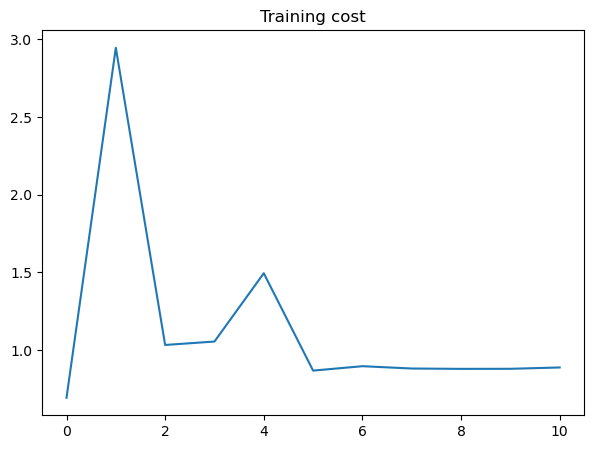

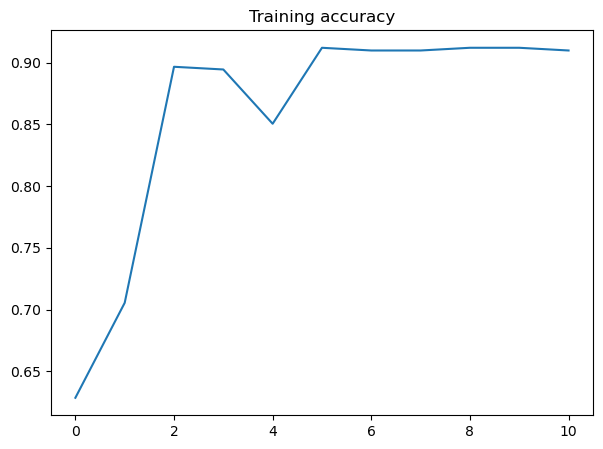

In [130]:
# Visualize cost and accuracy
plt.figure(figsize = (7, 5))
plt.title('Training cost')
plt.plot(t_cost)
plt.show()
plt.figure(figsize = (7, 5))
plt.title('Training accuracy')
plt.plot(t_accuracy)
plt.show()

In [131]:
def accuracy(y_pred, y_true):
    return np.sum(y_pred == y_true) / len(y_true)

In [132]:
# Testing set accuracy
test_pred = model.pred(X_test)
print(f'Test accuracy = {accuracy(y_test, test_pred)}')

Test accuracy = 0.9473684210526315
